# Importing all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from IPython.display import Image, display
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from IPython.display import Image, display

# Show top 5 data

In [2]:
csv_df = pd.read_csv('Skincare.csv')
csv_df.head()

,Unnamed: 0,product_href,product_name,product_type,brand,notable_effects,skintype,price,description,picture_src,Sensitive,Oily,Dry,Normal
0,0,https://www.beautyhaul.com/product/detail/bubb...,ACWELL Bubble Free PH Balancing Cleanser,Face Wash,ACWELL,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Oily,Rp 209.000,Mengangkat kotoran dan menghapus makeup dalam ...,https://www.beautyhaul.com/assets/uploads/prod...,0,1,0,0
1,1,https://www.sociolla.com/face-wash/62452-ph-ba...,ACWELL pH Balancing Soothing Cleansing Foam,Face Wash,ACWELL,"Soothing, Balancing","Normal, Dry, Combination",Rp 181.800,Membersihkan dan menenangkan kulit sensitif de...,https://images.soco.id/8f08ced0-344d-41f4-a15e...,0,0,1,1
2,2,https://www.sociolla.com/toner/15871-licorice-...,Acwell Licorice pH Balancing Cleansing Toner,Toner,ACWELL,"Soothing, Balancing","Normal, Dry, Oily, Combination, Sensitive",Rp 149.000,"Mengangkat sisa kotoran, debu, dan make up sek...","https://www.soco.id/cdn-cgi/image/w=73,format=...",1,1,1,1
3,3,https://www.beautyhaul.com/product/detail/aqua...,ACWELL Aquaseal Soothing Tonic,Toner,ACWELL,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Oily,Rp 290.000,Pre-essence yang diformulasikan dengan ekstrak...,https://www.beautyhaul.com/assets/uploads/prod...,0,1,0,0
4,4,https://www.sociolla.com/essence/38023-licoric...,Licorice pH Balancing Essence Mist,Toner,ACWELL,"Brightening, Soothing","Normal, Dry",Rp 194.650,Essens mist dengan kelembapan tinggi yang memb...,"https://www.sociolla.com/cdn-cgi/image/w=425,f...",0,0,1,1


# Cleaning data

In [3]:
cleaned_data = pd.read_csv('Skincare.csv')

cleaned_file_path = 'Skincare.csv'
cleaned_data.to_csv(cleaned_file_path, index=False)

In [4]:
cleaned_data.head()

,Unnamed: 0,product_href,product_name,product_type,brand,notable_effects,skintype,price,description,picture_src,Sensitive,Oily,Dry,Normal
0,0,https://www.beautyhaul.com/product/detail/bubb...,ACWELL Bubble Free PH Balancing Cleanser,Face Wash,ACWELL,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Oily,Rp 209.000,Mengangkat kotoran dan menghapus makeup dalam ...,https://www.beautyhaul.com/assets/uploads/prod...,0,1,0,0
1,1,https://www.sociolla.com/face-wash/62452-ph-ba...,ACWELL pH Balancing Soothing Cleansing Foam,Face Wash,ACWELL,"Soothing, Balancing","Normal, Dry, Combination",Rp 181.800,Membersihkan dan menenangkan kulit sensitif de...,https://images.soco.id/8f08ced0-344d-41f4-a15e...,0,0,1,1
2,2,https://www.sociolla.com/toner/15871-licorice-...,Acwell Licorice pH Balancing Cleansing Toner,Toner,ACWELL,"Soothing, Balancing","Normal, Dry, Oily, Combination, Sensitive",Rp 149.000,"Mengangkat sisa kotoran, debu, dan make up sek...","https://www.soco.id/cdn-cgi/image/w=73,format=...",1,1,1,1
3,3,https://www.beautyhaul.com/product/detail/aqua...,ACWELL Aquaseal Soothing Tonic,Toner,ACWELL,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Oily,Rp 290.000,Pre-essence yang diformulasikan dengan ekstrak...,https://www.beautyhaul.com/assets/uploads/prod...,0,1,0,0
4,4,https://www.sociolla.com/essence/38023-licoric...,Licorice pH Balancing Essence Mist,Toner,ACWELL,"Brightening, Soothing","Normal, Dry",Rp 194.650,Essens mist dengan kelembapan tinggi yang memb...,"https://www.sociolla.com/cdn-cgi/image/w=425,f...",0,0,1,1


In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1210 non-null   int64 
 1   product_href     1210 non-null   object
 2   product_name     1210 non-null   object
 3   product_type     1210 non-null   object
 4   brand            1210 non-null   object
 5   notable_effects  1210 non-null   object
 6   skintype         1210 non-null   object
 7   price            1210 non-null   object
 8   description      1210 non-null   object
 9   picture_src      1210 non-null   object
 10  Sensitive        1210 non-null   int64 
 11  Oily             1210 non-null   int64 
 12  Dry              1210 non-null   int64 
 13  Normal           1210 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 132.5+ KB


In [6]:
cleaned_data.isna().sum()

Unnamed: 0         0
product_href       0
product_name       0
product_type       0
brand              0
notable_effects    0
skintype           0
price              0
description        0
picture_src        0
Sensitive          0
Oily               0
Dry                0
Normal             0
dtype: int64

In [7]:
cleaned_data.describe()

,Unnamed: 0,Sensitive,Oily,Dry,Normal
count,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000
mean,607.697521,0.404959,0.685950,0.598347,0.439669
std,353.278764,0.491087,0.464328,0.490435,0.496552
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,302.250000,0.000000,0.000000,0.000000,0.000000
50%,605.500000,0.000000,1.000000,1.000000,0.000000
75%,909.750000,1.000000,1.000000,1.000000,1.000000
max,1223.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
cleaned_data.describe(include="all")

,Unnamed: 0,product_href,product_name,product_type,brand,notable_effects,skintype,price,description,picture_src,Sensitive,Oily,Dry,Normal
count,1210.000000,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210.000000,1210.000000,1210.000000,1210.000000
unique,NaN,1183,1192,5,211,151,15,512,1141,1182,NaN,NaN,NaN,NaN
top,NaN,https://www.sociolla.com/face-gel/27920-waterm...,Dear Me Beauty Watermelon Multipurpose Gel,Serum,SOMETHINC,"Pore-Care, Brightening, Anti-Aging",Oily,Rp 99.000,#NAME?,"https://www.soco.id/cdn-cgi/image/w=73,format=...",NaN,NaN,NaN,NaN
freq,NaN,3,3,296,70,149,307,28,5,3,NaN,NaN,NaN,NaN
mean,607.697521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.404959,0.685950,0.598347,0.439669
std,353.278764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.491087,0.464328,0.490435,0.496552
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,302.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,605.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,0.000000
75%,909.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000


# Load the face skin type model

In [9]:
model = tf.keras.models.load_model('FaceDetectionModel.keras')

# Recommending the skincare

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Sensitive: 47.95%
Normal: 25.24%
Selected Skin Types: ['Sensitive: 47.95%', 'Normal: 25.24%']
Combined Probability: 73.20%



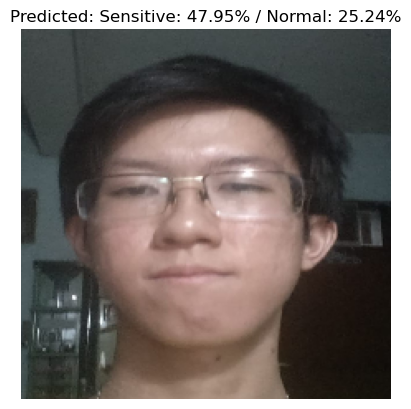

Top 5 skincare recommendations for Sensitive, Normal skin types:

1. VOTRE PEAU Serum Peptide Concentrate by VOTRE PEAU - Rp 185.000
   Effects: Hydrating, Moisturizing
   Links: https://www.beautyhaul.com/product/detail/peptide-serum


2. Make P:rem UV defense me. Blue sun cream SPF 50+ PA++++ by MAKE P:REM - Rp 245.000
   Effects: UV-Protection, No-Whitecast
   Links: https://www.sociolla.com/sunscreen/27608-uv-defense-me-blue-ray-sun-cream-spf-50-pa


3. Mediheal Tea Tree Biome Blemish Cica Toner by MEDIHEAL - Rp 279.000
   Effects: Soothing, Balancing
   Links: https://www.sociolla.com/toner/58369-tea-tree-biome-blemish-cica-toner


4. VOTRE PEAU Vitamin C Serum by VOTRE PEAU - Rp 265.000
   Effects: Pore-Care, Brightening, Anti-Aging
   Links: https://www.beautyhaul.com/product/detail/vitamin-c-serum


5. Erha ERHA 3 Balancing Toner  by ERHA - Rp 81.950
   Effects: Soothing, Balancing
   Links: https://www.sociolla.com/toner/9360-erha-3-balancing-toner


In [11]:
def recommend_skincare(skin_types, csv_file='Skincare.csv'):
    df = pd.read_csv(csv_file)
    
    recommended_products = df[df['skintype'].apply(lambda x: all(skin_type in x for skin_type in skin_types))]
    
    display_columns = ['product_name', 'brand', 'notable_effects', 'price', 'description', 'product_href', 'picture_src']
    recommended_products = recommended_products[display_columns]
    
    if recommended_products.empty:
        print("No skincare products found for the selected skin types.\n")
        return

    recommendations = recommended_products.sample(n=5).reset_index(drop=True)
    
    print(f"Top 5 skincare recommendations for {', '.join(skin_types)} skin types:\n")
    num = 1
    for idx, row in recommendations.iterrows():
        print(f"{num}. {row['product_name']} by {row['brand']} - {row['price']}")
        print(f"   Effects: {row['notable_effects']}")
        print(f"   Links: {row['product_href']}")
        
        display(Image(url=row['picture_src'], width=150, height=150)) #buat adjust ukuran image product
        
        num += 1

def predict_and_recommend_skin_type(img_path, csv_file="Skincare.csv", threshold=65):
    img_array = prepare_image(img_path)
    predictions = model.predict(img_array)
    
    
    class_labels = ['Dry', 'Normal', 'Oily', 'Sensitive']
    predicted_probabilities = predictions[0]
    
    
    prediction_dict = {label: prob for label, prob in zip(class_labels, predicted_probabilities)}
    
    
    sorted_predictions = sorted(prediction_dict.items(), key=lambda x: x[1], reverse=True)
    
    combined_prob = 0
    selected_skin_types = []
    

    for label, prob in sorted_predictions:
        combined_prob += prob * 100
        selected_skin_types.append(f"{label}: {prob * 100:.2f}%")
        print(f"{label}: {prob * 100:.2f}%")
        if combined_prob >= threshold:
            break
    
    print(f"Selected Skin Types: {selected_skin_types}")
    print(f"Combined Probability: {combined_prob:.2f}%\n")

    img = load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.title(f"Predicted: {' / '.join(selected_skin_types)}")
    plt.axis('off')
    plt.show()
    
    recommend_skincare([label.split(':')[0] for label in selected_skin_types], csv_file=csv_file)

def prepare_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

img_path = 'Test_Images/Jonathan.jpg' 
predict_and_recommend_skin_type(img_path, csv_file='Skincare.csv')